In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
car_rental_data = pd.read_csv("../Data/car_2018 2019.csv")

In [3]:
car_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27633 entries, 0 to 27632
Data columns (total 17 columns):
Unnamed: 0            27633 non-null int64
AVG_BEFORE_DAYS       27633 non-null float64
AVG_FARE              27633 non-null float64
CHANGE PERCENT        27633 non-null float64
COLLECT_DATE          27633 non-null object
HOLIDAY               27633 non-null int64
HOLIDAY AFTER         27633 non-null int64
HOLIDAY BEFORE        27633 non-null int64
LOR                   27633 non-null int64
MAX_FARE              27633 non-null float64
MEDIAN_FARE           27633 non-null float64
MIN_FARE              27633 non-null float64
OUTSIPP               27633 non-null object
PICKUP_DATE           27633 non-null object
TIME BEFORE RENTAL    27633 non-null int64
WEEKEND               27633 non-null int64
CHANGE                27633 non-null object
dtypes: float64(6), int64(7), object(4)
memory usage: 3.6+ MB


In [4]:
# Coverting column types and dropping the right columns
car_rental_data["COLLECT_DATE"] = pd.to_datetime(car_rental_data["COLLECT_DATE"], format='%Y-%m-%d')
car_rental_data["PICKUP_DATE"] = pd.to_datetime(car_rental_data["PICKUP_DATE"], format='%Y-%m-%d')
car_rental_data.drop(columns = "Unnamed: 0", inplace = True)

# Sorting by pickup date
car_rental_data.sort_values(by = "PICKUP_DATE", inplace=True)

In [5]:
car_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27633 entries, 0 to 10567
Data columns (total 16 columns):
AVG_BEFORE_DAYS       27633 non-null float64
AVG_FARE              27633 non-null float64
CHANGE PERCENT        27633 non-null float64
COLLECT_DATE          27633 non-null datetime64[ns]
HOLIDAY               27633 non-null int64
HOLIDAY AFTER         27633 non-null int64
HOLIDAY BEFORE        27633 non-null int64
LOR                   27633 non-null int64
MAX_FARE              27633 non-null float64
MEDIAN_FARE           27633 non-null float64
MIN_FARE              27633 non-null float64
OUTSIPP               27633 non-null object
PICKUP_DATE           27633 non-null datetime64[ns]
TIME BEFORE RENTAL    27633 non-null int64
WEEKEND               27633 non-null int64
CHANGE                27633 non-null object
dtypes: datetime64[ns](2), float64(6), int64(6), object(2)
memory usage: 3.6+ MB


In [6]:
car_rental_data.head()

,AVG_BEFORE_DAYS,AVG_FARE,CHANGE PERCENT,COLLECT_DATE,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,LOR,MAX_FARE,MEDIAN_FARE,MIN_FARE,OUTSIPP,PICKUP_DATE,TIME BEFORE RENTAL,WEEKEND,CHANGE
0,43.655,41.51,-0.046834,2018-01-01,0,0,0,7,107.6100,26.603125,18.355556,CCAR,2018-01-31,30,0,Decrease
21978,33.960,33.71,-0.007308,2018-01-01,0,0,0,5,61.2550,31.960750,19.011250,CDAR,2018-01-31,30,0,Decrease
22019,33.630,33.45,-0.005324,2018-01-01,0,0,0,5,61.2150,31.902875,18.973750,EDAR,2018-01-31,30,0,Decrease
7748,91.080,85.87,-0.054107,2018-01-01,0,0,0,7,196.4925,70.552083,37.237778,LCAR,2018-01-31,30,0,Decrease
22060,38.385,38.31,-0.001950,2018-01-01,0,0,0,5,63.9250,39.107750,21.138750,FDAR,2018-01-31,30,0,No change


*****
Reduce outsipp to 5 logical categories

In [26]:
temp1 = car_rental_data.loc[:,["OUTSIPP" , "AVG_FARE"]].groupby("OUTSIPP")["AVG_FARE"].mean()
temp1[:5]

OUTSIPP
CCAR     63.689617
CDAR     59.771463
CFAR     70.709957
CTAR    122.003715
ECAR     63.491191
Name: AVG_FARE, dtype: float64

In [27]:
temp1.describe()

count     59.000000
mean     108.767105
std       80.779448
min       49.092145
25%       67.115521
50%       85.943560
75%      120.135808
max      509.005000
Name: AVG_FARE, dtype: float64

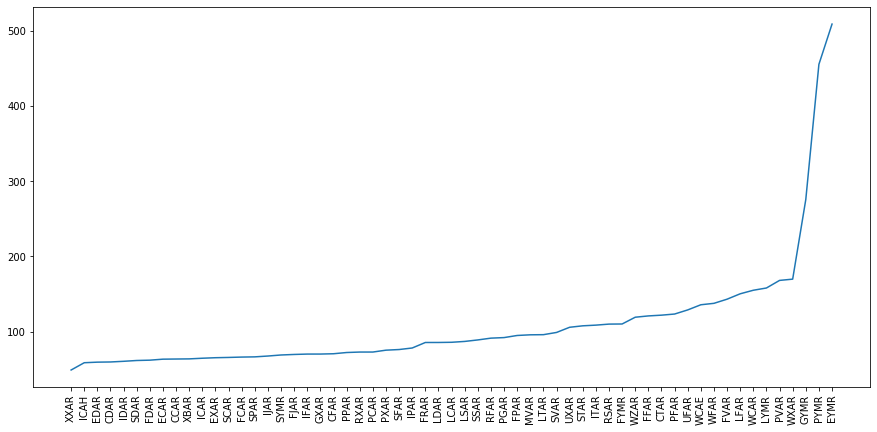

In [28]:
plt.figure(figsize=(15,7))
plt.plot(temp1.sort_values())
plt.xticks(rotation = 90)
plt.show()

In [32]:
abc = temp1.sort_values()[-5:]
abc

OUTSIPP
PVAR    168.205871
WXAR    169.894491
GYMR    275.759333
PYMR    455.506875
EYMR    509.005000
Name: AVG_FARE, dtype: float64

In [33]:
temp1 = temp1.drop( abc.index.to_list() , axis = 0)

In [36]:
# premium > luxury > midrange> economy > basic

ref1 = pd.qcut(temp1 , 4 , labels = [ "basic" , "economy" , "midrange" , "luxury"])
ref1 = ref1.append(pd.Series( data = ["premium","premium","premium"] , index =["GYMR" , "PYMR" , "EYMR"]))
ref1[:5]

CCAR      basic
CDAR      basic
CFAR    economy
CTAR     luxury
ECAR      basic
dtype: object

*****
Second scheme

In [37]:
temp2 = car_rental_data.loc[:,["OUTSIPP" , "AVG_FARE"]].groupby("OUTSIPP")["AVG_FARE"].mean()
ref = temp2.sort_values().reset_index()
ref2 = pd.Series( data = ref.index/sum(ref.index) , index=ref["OUTSIPP"])
ref2[:5]

OUTSIPP
XXAR    0.000000
ICAH    0.000584
EDAR    0.001169
CDAR    0.001753
IDAR    0.002338
dtype: float64

In [38]:
#Choose ref1 or ref2
ref = ref1

In [39]:
car_rental_data["new_OUTSIPP"] = ref[car_rental_data["OUTSIPP"]].to_list()

In [40]:
orig_car_rental_data = car_rental_data[:]

In [41]:
car_rental_data = car_rental_data.drop(columns = "OUTSIPP")
car_rental_data.columns

Index(['AVG_BEFORE_DAYS', 'AVG_FARE', 'CHANGE PERCENT', 'COLLECT_DATE',
       'HOLIDAY', 'HOLIDAY AFTER', 'HOLIDAY BEFORE', 'LOR', 'MAX_FARE',
       'MEDIAN_FARE', 'MIN_FARE', 'PICKUP_DATE', 'TIME BEFORE RENTAL',
       'WEEKEND', 'CHANGE', 'PICKUP_DATE_YEAR', 'PICKUP_DATE_MONTH',
       'PICKUP_DATE_DATE', 'new_OUTSIPP'],
      dtype='object')

In [42]:
car_rental_data.head()

,AVG_BEFORE_DAYS,AVG_FARE,CHANGE PERCENT,COLLECT_DATE,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,LOR,MAX_FARE,MEDIAN_FARE,MIN_FARE,PICKUP_DATE,TIME BEFORE RENTAL,WEEKEND,CHANGE,PICKUP_DATE_YEAR,PICKUP_DATE_MONTH,PICKUP_DATE_DATE,new_OUTSIPP
0,43.655,41.51,-0.046834,2018-01-01,0,0,0,7,107.6100,26.603125,18.355556,2018-01-31,30,0,Decrease,2018,1,31,basic
21978,33.960,33.71,-0.007308,2018-01-01,0,0,0,5,61.2550,31.960750,19.011250,2018-01-31,30,0,Decrease,2018,1,31,basic
22019,33.630,33.45,-0.005324,2018-01-01,0,0,0,5,61.2150,31.902875,18.973750,2018-01-31,30,0,Decrease,2018,1,31,basic
7748,91.080,85.87,-0.054107,2018-01-01,0,0,0,7,196.4925,70.552083,37.237778,2018-01-31,30,0,Decrease,2018,1,31,midrange
22060,38.385,38.31,-0.001950,2018-01-01,0,0,0,5,63.9250,39.107750,21.138750,2018-01-31,30,0,No change,2018,1,31,basic


In [63]:
car_rental_data[car_rental_data.isnull()]

,AVG_BEFORE_DAYS,AVG_FARE,CHANGE PERCENT,COLLECT_DATE,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,LOR,MAX_FARE,MEDIAN_FARE,...,TIME BEFORE RENTAL,WEEKEND,CHANGE,PICKUP_DATE_YEAR,PICKUP_DATE_MONTH,PICKUP_DATE_DATE,OUTSIPP_economy,OUTSIPP_luxury,OUTSIPP_midrange,OUTSIPP_premium
0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21978,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22019,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7748,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22060,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4229,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27387,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23273,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25584,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
car_rental_data.isnull().sum()

AVG_BEFORE_DAYS          0
AVG_FARE                 0
CHANGE PERCENT           0
COLLECT_DATE             0
HOLIDAY                  0
HOLIDAY AFTER            0
HOLIDAY BEFORE           0
LOR                      0
MAX_FARE                 0
MEDIAN_FARE              0
MIN_FARE                 0
PICKUP_DATE              0
TIME BEFORE RENTAL       0
WEEKEND                  0
CHANGE                   0
PICKUP_DATE_YEAR         0
PICKUP_DATE_MONTH        0
PICKUP_DATE_DATE         0
new_OUTSIPP           1127
dtype: int64

In [44]:
car_rental_data.dropna(inplace=True)

In [45]:
print("Min: " , min(car_rental_data["PICKUP_DATE"]), "\nMax: ", max(car_rental_data["PICKUP_DATE"]))

Min:  2018-01-31 00:00:00 
Max:  2020-01-29 00:00:00


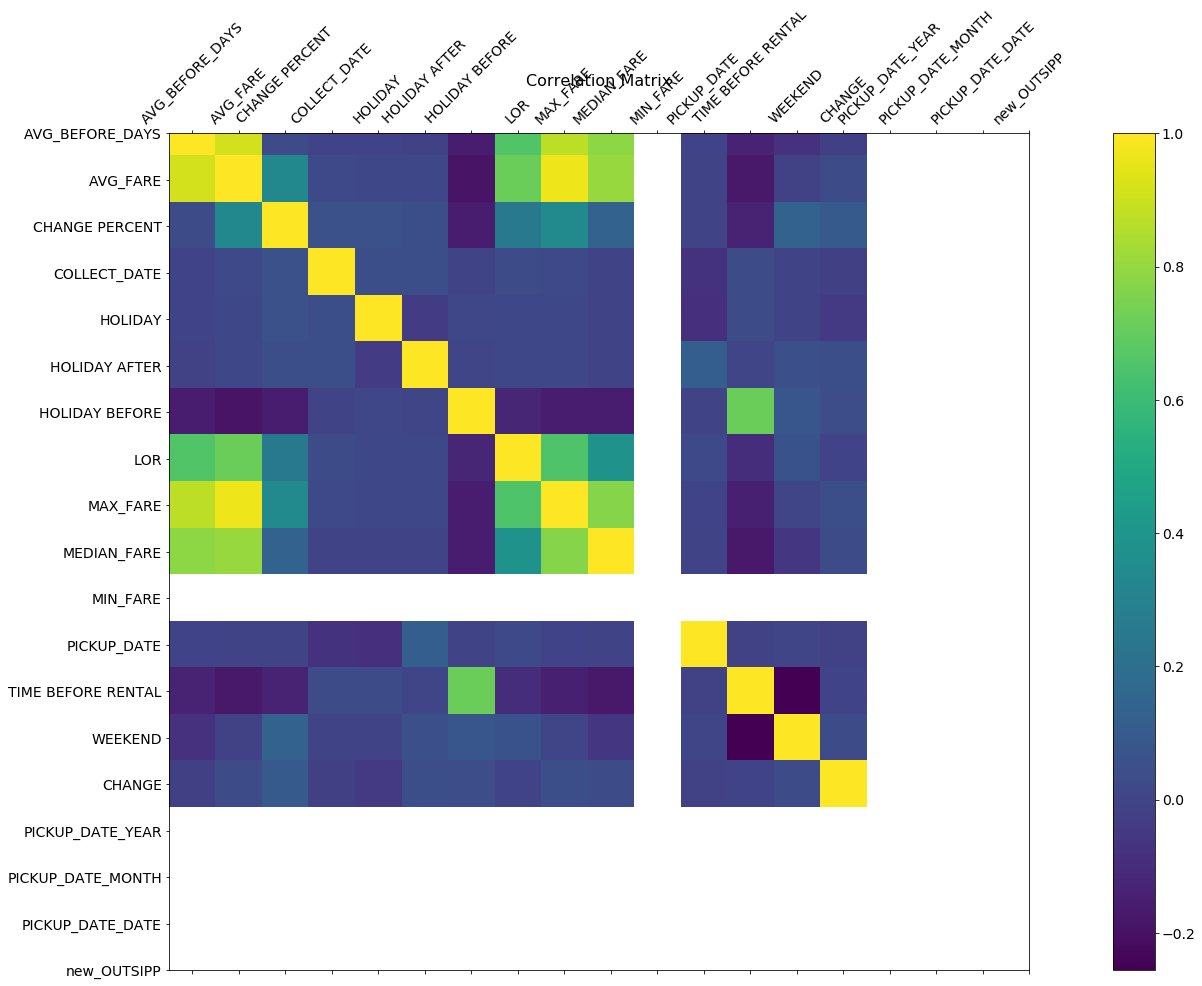

In [46]:
# Checking for correlations
f = plt.figure(figsize=(30, 15))
plt.matshow(car_rental_data.corr(), fignum=f.number)
plt.xticks(range(car_rental_data.shape[1]), car_rental_data.columns, fontsize=14, rotation=45)
plt.yticks(range(car_rental_data.shape[1]), car_rental_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### are we dropping any columns based on corr? Why is NaN

In [47]:
corr = car_rental_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,AVG_BEFORE_DAYS,AVG_FARE,CHANGE PERCENT,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,LOR,MAX_FARE,MEDIAN_FARE,MIN_FARE,TIME BEFORE RENTAL,WEEKEND,PICKUP_DATE_YEAR,PICKUP_DATE_MONTH,PICKUP_DATE_DATE
AVG_BEFORE_DAYS,1,0.914578,0.0287479,-0.00560542,-0.00532733,-0.0090014,-0.153806,0.659892,0.876019,0.788839,nan,-0.000927452,-0.128971,-0.0786741,-0.0157911
AVG_FARE,0.914578,1,0.32928,0.0205011,0.0154421,0.0161017,-0.1883,0.716327,0.969197,0.805589,nan,-0.000754937,-0.16875,-0.00980298,0.0363364
CHANGE PERCENT,0.0287479,0.32928,1,0.0575671,0.0554773,0.0438045,-0.160415,0.254137,0.346704,0.140069,nan,0.00290276,-0.134559,0.138293,0.0982091
HOLIDAY,-0.00560542,0.0205011,0.0575671,1,0.0460638,0.0468799,0.00386524,0.0309625,0.0216657,0.00370882,nan,-0.0722465,0.0371167,0.000491493,-0.0161297
HOLIDAY AFTER,-0.00532733,0.0154421,0.0554773,0.0460638,1,-0.0357749,0.0112953,0.0161139,0.0147414,0.00292848,nan,-0.0878642,0.0376024,0.00383357,-0.0442143
HOLIDAY BEFORE,-0.0090014,0.0161017,0.0438045,0.0468799,-0.0357749,1,0.00674002,0.0173833,0.0141717,-0.00011425,nan,0.118457,0.00647904,0.0492462,0.0481967
LOR,-0.153806,-0.1883,-0.160415,0.00386524,0.0112953,0.00674002,1,-0.120112,-0.153676,-0.15557,nan,0.00127489,0.717547,0.0797133,0.0421948
MAX_FARE,0.659892,0.716327,0.254137,0.0309625,0.0161139,0.0173833,-0.120112,1,0.65452,0.385321,nan,0.0219581,-0.0924153,0.0610406,-0.00398133
MEDIAN_FARE,0.876019,0.969197,0.346704,0.0216657,0.0147414,0.0141717,-0.153676,0.65452,1,0.773354,nan,-0.000789808,-0.144648,0.0074246,0.0462167
MIN_FARE,0.788839,0.805589,0.140069,0.00370882,0.00292848,-0.00011425,-0.15557,0.385321,0.773354,1,nan,0.000131699,-0.17074,-0.0549623,0.0352389


# Extracting, converting the features

In [48]:
# Extracting year, month and date from pickup date
car_rental_data["PICKUP_DATE_YEAR"] = pd.DatetimeIndex(car_rental_data["PICKUP_DATE"]).year
car_rental_data["PICKUP_DATE_MONTH"] = pd.DatetimeIndex(car_rental_data["PICKUP_DATE"]).month
car_rental_data["PICKUP_DATE_DATE"] = pd.DatetimeIndex(car_rental_data["PICKUP_DATE"]).day

In [49]:
# converting car_type to one-hot encoded format
car_rental_data = pd.get_dummies(car_rental_data, columns = ["new_OUTSIPP"] , prefix = "OUTSIPP", drop_first=True)

In [50]:
car_rental_data.head()

,AVG_BEFORE_DAYS,AVG_FARE,CHANGE PERCENT,COLLECT_DATE,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,LOR,MAX_FARE,MEDIAN_FARE,...,TIME BEFORE RENTAL,WEEKEND,CHANGE,PICKUP_DATE_YEAR,PICKUP_DATE_MONTH,PICKUP_DATE_DATE,OUTSIPP_economy,OUTSIPP_luxury,OUTSIPP_midrange,OUTSIPP_premium
0,43.655,41.51,-0.046834,2018-01-01,0,0,0,7,107.6100,26.603125,...,30,0,Decrease,2018,1,31,0,0,0,0
21978,33.960,33.71,-0.007308,2018-01-01,0,0,0,5,61.2550,31.960750,...,30,0,Decrease,2018,1,31,0,0,0,0
22019,33.630,33.45,-0.005324,2018-01-01,0,0,0,5,61.2150,31.902875,...,30,0,Decrease,2018,1,31,0,0,0,0
7748,91.080,85.87,-0.054107,2018-01-01,0,0,0,7,196.4925,70.552083,...,30,0,Decrease,2018,1,31,0,0,1,0
22060,38.385,38.31,-0.001950,2018-01-01,0,0,0,5,63.9250,39.107750,...,30,0,No change,2018,1,31,0,0,0,0


In [51]:
car_rental_data.columns

Index(['AVG_BEFORE_DAYS', 'AVG_FARE', 'CHANGE PERCENT', 'COLLECT_DATE',
       'HOLIDAY', 'HOLIDAY AFTER', 'HOLIDAY BEFORE', 'LOR', 'MAX_FARE',
       'MEDIAN_FARE', 'MIN_FARE', 'PICKUP_DATE', 'TIME BEFORE RENTAL',
       'WEEKEND', 'CHANGE', 'PICKUP_DATE_YEAR', 'PICKUP_DATE_MONTH',
       'PICKUP_DATE_DATE', 'OUTSIPP_economy', 'OUTSIPP_luxury',
       'OUTSIPP_midrange', 'OUTSIPP_premium'],
      dtype='object')

In [52]:
# Filtering features and creating a copy
classification_drop_features = ["AVG_FARE","COLLECT_DATE","LOR", 'MAX_FARE', 'MEDIAN_FARE',
       'MIN_FARE', 'PICKUP_DATE', 'TIME BEFORE RENTAL', "CHANGE PERCENT"]
classification_data = car_rental_data.copy()
classification_data.drop(columns = classification_drop_features, inplace=True)

In [53]:
classification_data.head()

,AVG_BEFORE_DAYS,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,WEEKEND,CHANGE,PICKUP_DATE_YEAR,PICKUP_DATE_MONTH,PICKUP_DATE_DATE,OUTSIPP_economy,OUTSIPP_luxury,OUTSIPP_midrange,OUTSIPP_premium
0,43.655,0,0,0,0,Decrease,2018,1,31,0,0,0,0
21978,33.960,0,0,0,0,Decrease,2018,1,31,0,0,0,0
22019,33.630,0,0,0,0,Decrease,2018,1,31,0,0,0,0
7748,91.080,0,0,0,0,Decrease,2018,1,31,0,0,1,0
22060,38.385,0,0,0,0,No change,2018,1,31,0,0,0,0


## Scaling data

In [54]:
classification_data.columns

Index(['AVG_BEFORE_DAYS', 'HOLIDAY', 'HOLIDAY AFTER', 'HOLIDAY BEFORE',
       'WEEKEND', 'CHANGE', 'PICKUP_DATE_YEAR', 'PICKUP_DATE_MONTH',
       'PICKUP_DATE_DATE', 'OUTSIPP_economy', 'OUTSIPP_luxury',
       'OUTSIPP_midrange', 'OUTSIPP_premium'],
      dtype='object')

In [55]:
# classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]].head(20)
classification_data[["AVG_BEFORE_DAYS"]].head(20)

,AVG_BEFORE_DAYS
0,43.655
21978,33.960
22019,33.630
7748,91.080
22060,38.385
22101,36.450
22142,98.760
22183,38.665
7043,66.900
6338,45.075


In [56]:
# Scaling AVG_BEFORE_DAYS and CHANGE PERCENT
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]] = scaler.fit_transform(classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]])
classification_data[["AVG_BEFORE_DAYS"]] = scaler.fit_transform(classification_data[["AVG_BEFORE_DAYS"]])

In [57]:
# classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]].head(20)
classification_data[["AVG_BEFORE_DAYS"]].head(20)

,AVG_BEFORE_DAYS
0,-1.220856
21978,-1.472890
22019,-1.481469
7748,0.012021
22060,-1.357856
22101,-1.408159
22142,0.211673
22183,-1.350577
7043,-0.616570
6338,-1.183941


# Machine Learning - Random Forest

In [58]:
# Extracting columns
classification_columns = [x for x in classification_data.columns.to_list() if x != "CHANGE"]
X = classification_data[classification_columns]
y = classification_data["CHANGE"]

In [59]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [60]:
# Checking correct sort order for train test splits
print("Min train date:", min(X_train["PICKUP_DATE_YEAR"]*100 + X_train["PICKUP_DATE_MONTH"]))
print("Max train date:", max(X_train["PICKUP_DATE_YEAR"]*100 + X_train["PICKUP_DATE_MONTH"]))

Min train date: 201801
Max train date: 201907


In [61]:
# Importing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, make_scorer

In [62]:
# Default model
default = RandomForestClassifier(random_state=1)
default.fit(X_train, y_train)
default_pred = default.predict(X_test)
print("Accuracy for default Random Forest on CV data: ",accuracy_score(y_test,default_pred))
print()
print("Balanced Accuracy for default Random Forest on CV data: ",balanced_accuracy_score(y_test,default_pred))
print()
for x, y in zip(X_train.columns.tolist(), default.feature_importances_):
    print(x,round(y,2))
print()
print("AUC", roc_auc_score(y_test, default.predict_proba(X_test)[:,1]))

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy for default Random Forest on CV data:  0.3963782696177062

Balanced Accuracy for default Random Forest on CV data:  0.41443197720293234

AVG_BEFORE_DAYS 0.48
HOLIDAY 0.01
HOLIDAY AFTER 0.01
HOLIDAY BEFORE 0.01
WEEKEND 0.01
PICKUP_DATE_YEAR 0.02
PICKUP_DATE_MONTH 0.22
PICKUP_DATE_DATE 0.21
OUTSIPP_economy 0.01
OUTSIPP_luxury 0.01
OUTSIPP_midrange 0.01
OUTSIPP_premium 0.0



ValueError: multiclass format is not supported

In [ ]:
%timeit
rfc = RandomForestClassifier(random_state=1)
# Setting grid parameters
n_estimators = [100, 200, 300, 500, 800]
max_depth = [None, 4, 5, 6, 7, 8, 9, 10]
max_features = ['auto', 'sqrt', 'log2']
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10]
criterion = ['gini', 'entropy']


parameters = dict(n_estimators = n_estimators, max_depth = max_depth,
                  criterion = criterion, max_features = max_features)

gridF = GridSearchCV(estimator = rfc, param_grid = parameters, cv = 5, verbose = 1,
                      n_jobs = -1)
gridF.fit(X_train, y_train)

In [ ]:
# Best parameters
gridF.best_params_

In [ ]:
# Reinitializing the best model
best_model = RandomForestClassifier(random_state=1, criterion="entropy", max_depth=4, max_features="log2", 
                                   n_estimators=500)
best_model.fit(X_train,y_train)

In [ ]:
pred = best_model.predict(X_test)
print("Accuracy for best Random Forest on CV data: ",accuracy_score(y_test,pred))

In [ ]:
print("Balanced Accuracy for default Random Forest on CV data: ",balanced_accuracy_score(y_test,pred))

In [ ]:
print("AUC", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))

In [ ]:
for x, y in zip(X_train.columns.tolist(), best_model.feature_importances_):
    print(x,round(y,2))

## Extracting the data for classification

In [ ]:
classification_data = classification_data.reset_index(drop=True)
classification_data.to_csv("classification_data.csv")